# 平行多导线系统参数计算函数

文件名： conductor_calc1.pynb
日期： 2018.05.01
编写人： 陈剑云

 ## 1 多导线原始参数
 
 **牵引网导线架设横截面示意图**

  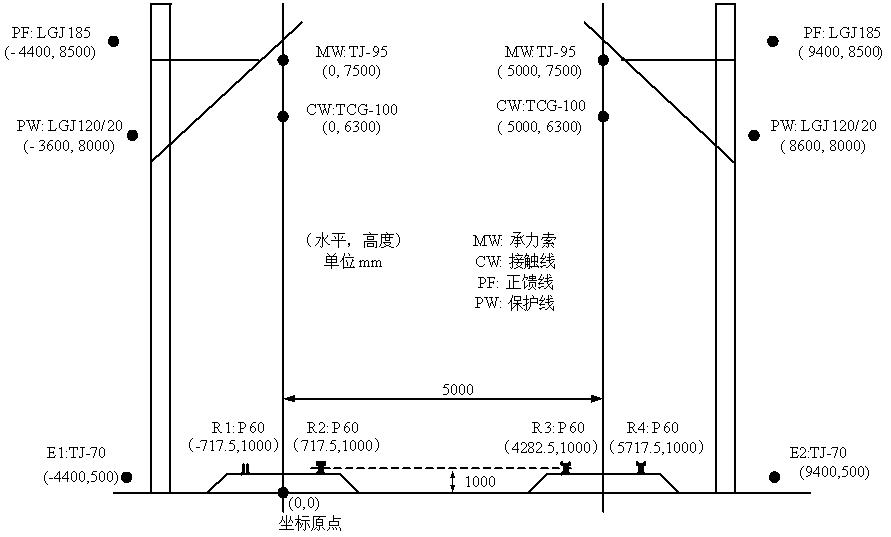   




** 导线编号：**
 
|导线号 | 导线代码 | 导线名称 |
|:---|:---|:---|
|01|CW1|接触导线1|
|02|MW1|承力索1|
|03|PF1|正馈线1|
|04|RA1|钢轨1|
|05|RA2|钢轨2|
|06|PW1|保护线1|
|07|E1|综合地线1|
|08|CW2|接触导线2|
|09|MW2|承力索2|
|10|PF2|正馈线2|
|11|RA3|钢轨3|
|12|RA4|钢轨4|
|13|PW2|保护线2|
|14|E2|综合地线2|
  
 


** 导线架设截面坐标：**
函数
conductors_coordinater=0.001*np.array([[0,6300],[0,7500],[-4400,8500],[-755,1000],[755,1000],[-3600,8000],[-4400,500],
                                 [5000,6300],[5000,7500],[4400+5000,8500],[4245,1000],[5755,1000],[3600+5000,8000],
                                 [4400+5000,500]],np.float64)  # 多导体坐标数组 (x,y),单位 m

** 导线计算半径：**
conductors_calc_radius=0.001*np.array([5.9,7.00,9.5,109.1,109.1,7.60,5.35,5.9,7.00,9.5,109.1,109.1,7.60,5.35])
                                    #多导体计算半径，单位 m， 计算电位系数用
** 导线等效半径：**
conductors_equivalent_radius=0.001*np.array([4.2,5.31,9.03,12.79,12.79,7.22,4.055,4.2,5.31,9.03,12.79,12.79,7.22,4.055])
                                    #多导体等效半径,单位m, 计算自电感用
** 导线直流电阻：**
conductors_resistance=np.array([0.146,0.158,0.163,0.135,0.135,0.255,0.28,0.146,0.158,0.163,0.135,0.135,0.255,0.28])
                                    #多导体直流电阻，单位 欧/km
                                    
                               
{原始参数在软件开发前期用数组形式给出，在后阶段以数据文件的形式存储，通过读取数据生成变量。}

In [2]:
import numpy as np
from scipy import linalg
from scipy import constants as C
from scipy import special

#导线定义

"""
1. 接触线（CW1）; 2.承力索（MW1）; 3.正馈线（PF1）; 4.钢轨1（RA1）;5.钢轨2（RA2）;6.保护线（PW1）;7.综合地线（E1）
8. 接触线（CW2）; 9.承力索（MW2）; 10.正馈线（PF2）; 11.钢轨3（RA3）;12.钢轨4（RA4）;13.保护线（PW2）;14.综合地线（E2）

"""
conductors_coordinater = 0.001*np.array([[0,6300],[0,7500],[-4400,8500],[-755,1000],[755,1000],[-3600,8000],[-4400,500],
                                 [5000,6300],[5000,7500],[4400+5000,8500],[4245,1000],[5755,1000],[3600+5000,8000],
                                 [4400+5000,500]],np.float64)  # 多导体坐标数组 (x,y),单位 m

conductors_calc_radius = 0.001*np.array([5.9,7.00,9.5,109.1,109.1,7.60,5.35,5.9,7.00,9.5,109.1,109.1,7.60,5.35])
                                    #多导体计算半径，单位 m， 计算电位系数用

conductors_equivalent_radius = 0.001*np.array([4.2,5.31,9.03,12.79,12.79,7.22,4.055,4.2,5.31,9.03,12.79,12.79,7.22,4.055])
                                    #多导体等效半径,单位m, 自电感简化计算参数

Rd = np.array([0.146,0.158,0.163,0.135,0.135,0.255,0.28,0.146,0.158,0.163,0.135,0.135,0.255,0.28])
                                    #多导体直流电阻，单位 欧/km
    
mu_r = np.array([1,1,1,40,40,1,1,1,1,1,40,40,1,1]) #导线相对磁导率
rho = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])*0.01777*10**-6  #导线材料电阻率

conductors_coordinater,conductors_calc_radius,conductors_equivalent_radius,Rd, mu_r, rho

(array([[ 0.   ,  6.3  ],
        [ 0.   ,  7.5  ],
        [-4.4  ,  8.5  ],
        [-0.755,  1.   ],
        [ 0.755,  1.   ],
        [-3.6  ,  8.   ],
        [-4.4  ,  0.5  ],
        [ 5.   ,  6.3  ],
        [ 5.   ,  7.5  ],
        [ 9.4  ,  8.5  ],
        [ 4.245,  1.   ],
        [ 5.755,  1.   ],
        [ 8.6  ,  8.   ],
        [ 9.4  ,  0.5  ]]),
 array([0.0059 , 0.007  , 0.0095 , 0.1091 , 0.1091 , 0.0076 , 0.00535,
        0.0059 , 0.007  , 0.0095 , 0.1091 , 0.1091 , 0.0076 , 0.00535]),
 array([0.0042  , 0.00531 , 0.00903 , 0.01279 , 0.01279 , 0.00722 ,
        0.004055, 0.0042  , 0.00531 , 0.00903 , 0.01279 , 0.01279 ,
        0.00722 , 0.004055]),
 array([0.146, 0.158, 0.163, 0.135, 0.135, 0.255, 0.28 , 0.146, 0.158,
        0.163, 0.135, 0.135, 0.255, 0.28 ]),
 array([ 1,  1,  1, 40, 40,  1,  1,  1,  1,  1, 40, 40,  1,  1]),
 array([1.777e-08, 1.777e-08, 1.777e-08, 1.777e-08, 1.777e-08, 1.777e-08,
        1.777e-08, 1.777e-08, 1.777e-08, 1.777e-08, 1.777e-08, 1.777

## 2 电位系数矩阵计算

  **函数名：  calc_potential_coefficient(c_xy,r)** 
  
 * parameters:    
       1. c_xy:  2×n维数组，多导线的坐标（x,y）,单位(m);  
       2. r:     1×n维数组，导线的半径,单位(m)  
 * Return:
       1. P:     n×n维数组，电位系数，单位$(K/km)^{-1}$  
 * 功能：        计算多导体的电位系数矩阵P。 
 
  计算公式：  
   
   $$ P_{ii}=\frac{1}{2\pi\epsilon}ln\frac{2h_{i}}{r_i}=18×10^６ln\frac{2h_{i}}{r_i}$$
   
   $$ P_{ij}=\frac{1}{2\pi\epsilon}ln\frac{D_{ij}}{d_{ij}}=18×10^６ln\frac{D_{ij}}{d_{ij}}  ~~~~ (i≠j) $$
   
   其中$\epsilon_0$为空气介电系数，单位(F/km)
   $$\epsilon_0=\frac{1}{36\pi 10^6}$$  
   
   
  ![ 导体镜像截面图](/images/conductors_section.png "")
  
  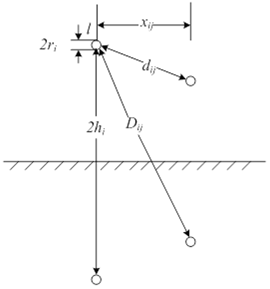
  

In [2]:
def calc_potential_coefficient(c_xy,r):
    """ 计算电位系数矩阵P
    """
   
    n=np.shape(c_xy)[0]
    P=np.empty((n,n),np.float64)
    for i in range(n):  
        for j in range(n):
            if i==j:
                P[i,i]=18*10**+6*np.log(2*c_xy[i,1]/r[i])
            else:
                Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                P[i,j]=18*10**+6*np.log(Dij/dij)
    return P

 ## 3 导线合并，求合并后的电位系数
 
  ** 函数名: merge_potential_coefficient(P,m,k)**
 * parameters:    
       1. P:      n×n 维数组，电位系数 ;  
       2. m:      第 m 号导线（导线序号从0开始）；
       3. k:      第 k 号导线，m＜k≤n,
 * Return:
       1. P:      n-1×n-1 维数组，归并后的电位系数   
   
 * 功能：         导线k并入导线m,计算修正后的电位系数P
 
  导线k并入m公式推导：
 
 \begin{equation} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  u_k\\
  \vdots\\
  u_n
  \end{bmatrix}=
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&P_{1k}&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&P_{mk}&\dots&P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\
    P_{k1}&\dots& P_{km}&\dots&P_{kk}&\dots&P_{kn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\ 
    P_{n1}&\dots& P_{nm}&\dots&P_{nk}&\dots&P_{nn}\\
   \end{bmatrix}
   \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
 \end{equation}

令 $q_{m}=q_{m}+q_{k}$ 有： 

\begin{equation} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  u_k\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&(P_{1k}-P_{1m})&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&(P_{mk}-P_{mm})&\dots&P_{mn}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
   P_{k1}&\dots& P_{km}&\dots&(P_{kk}-P_{km})&\dots&P_{kn}\\
  \vdots& &\vdots& &\vdots& &\vdots\\ 
   P_{n1}&\dots& P_{nm}&\dots&(P_{nk}-P_{nm})&\dots&P_{nn}\\
  \end{bmatrix}
  \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m+q_k\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
\end{equation}   

P矩阵第k列参数发生变化，修正公式为：$$P_{ik}=P_{ik}-P_{im} ( i=1,...,n), q_m=q_m+q_k$$.

方程中，$u_{k}-u_{m}=0$,得方程

 \begin{equation*} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  0\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&P_{1k}&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&P_{mk}&\dots&P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\
    P_{k1}- P_{m1}&\dots& P_{km}-P_{mm}&\dots&P_{kk}-P_{mk}&\dots&P_{kn}-P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\ 
    P_{n1}&\dots& P_{nm}&\dots&P_{nk}&\dots&P_{nn}\\
   \end{bmatrix}
   \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
\end{equation*}

第k行等式有:
$$ 0= (P_{k1}- P_{m1})q_1+\dots+（P_{km}-P_{mm})q_m+\dots+(P_{kk}-P_{mk})q_k+\dots+(P_{kn}-P_{mn})q_n$$

可以求得：
$$q_k=-\frac{(P_{k1}- P_{m1})}{(P_{kk}-P_{mk})}q_1-\dots-\frac{(P_{km}- P_{mm})}{(P_{kk}-P_{mk})}q_m\dots-\frac{(P_{kn}- P_{mn})}{(P_{kk}-P_{mk})}q_n$$

令$K_j=\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$ (j≠k)，有
$$q_k=-K_1q_1-\dots-K_m q_m-\dots-K_n q_n$$

导线电压$u_i$写成方程有：
$$u_i=P_{i1}q_1+\dots+P_{im}q_m+\dots+P_{ik}q_k+\dots+P_{in}q_n$$

把$q_k$代入方程中，得到
$$u_i=（P_{i1}-P_{ik}K_1)q_1+\dots+(P_{im}-P_{ik}K_m)q_m+\dots+(P_{in}-P_{ik}K_n)q_n$$

取(i,j=0,1,...,n; i≠k;j≠k),可以得到合并矩阵元素$P_{ij}$.
 $$P_{ij}=P_{ij}-P_{ik}K_j=P_{ij}-P_{ik}\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$$

总之，导线k合并到导线m，P参数的修正步骤归纳如下：

（1）$P_{ik}=P_{ik}-P_{im}$ ( i=1,...,n)

（2）$P_{ij}=P_{ij}-P_{ik}K_j=P_{ij}-P_{ik}\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$ （i,j=1,...,n; i≠k;j≠k）

（3）除P中的第k行第k列，P降n-1阶，为合并后n-1根导线的电位系数矩阵。


### 例
AT牵引网络由14根导线逐步合并成6根导线：
   
  （1） 1. 接触线（CW1）+ 2.承力索（MW1）
  
  （2） 3.正馈线（PF1）
  
  （3） 4.钢轨1（RA1）+5.钢轨2（RA2）+6.保护线（PW1）+7.综合地线（E1）
  
  （4） 8. 接触线（CW2）+ 9.承力索（MW2）
  
  （5） 10.正馈线（PF2）
  
  （6） 11.钢轨3（RA3）+12.钢轨4（RA4）+13.保护线（PW2）+14.综合地线（E2）
  
   

In [3]:
def merge_potential_coefficient(P,m,k):
    n=np.shape(P)[0]
    for i in range(n):
        P[i,k]=P[i,k]-P[i,m]
         
    for i in range(n):
        for j in range(n):
            if i!=k and j!=k:
                P[i,j]=P[i,j]-P[i,k]/(P[k,k]-P[m,k])*(P[k,j]-P[m,j])
                        
          
    E=np.empty((n-1,n-1),np.float64)
    for i in range(n):
        for j in range(n):

            if i<k:
                if j<k:
                    E[i,j]=P[i,j]
                if j>k:
                    E[i,j-1]=P[i,j]
            if i>k:
                if j<k:
                    E[i-1,j]=P[i,j]
                if j>k:
                    E[i-1,j-1]=P[i,j]
    
    return E

#测试
P=calc_potential_coefficient(conductors_coordinater,conductors_calc_radius)
P=merge_potential_coefficient(P,0,1) 
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,3,4)
P=merge_potential_coefficient(P,5,6)
P=merge_potential_coefficient(P,5,6)
P=merge_potential_coefficient(P,5,6)
np.set_printoptions(precision=3,linewidth=214,suppress=True)
print('P矩阵 e+7 : \n {}'.format(P*10**-7))

P矩阵 e+7 : 
 [[ 8.774  1.519  0.698  1.664  0.776  0.38 ]
 [ 1.479 11.939  0.928  0.779  0.452  0.199]
 [ 0.705  0.932  2.089  0.381  0.199  0.126]
 [ 1.655  0.821  0.365  8.783  1.527  0.701]
 [ 0.768  0.478  0.189  1.486 11.945  0.933]
 [ 0.383  0.205  0.117  0.707  0.932  2.083]]


## 4 电容系数矩阵计算

函数名： calc_B(P)



In [4]:
def calc_B(P):
    """ 计算电容系数矩阵"""
    
    B=linalg.inv(P)
    return B



B=calc_B(P)
np.set_printoptions(precision=3,linewidth=214,suppress=True)              
          
print('B矩阵(×e-9) : \n {}'.format(B*10**9))

B矩阵(×e-9) : 
 [[12.291 -1.149 -3.161 -1.936 -0.367 -1.127]
 [-1.116  8.823 -3.454 -0.379 -0.136 -0.242]
 [-3.194 -3.442 50.777 -1.119 -0.235 -1.678]
 [-1.922 -0.419 -1.037 12.283 -1.166 -3.159]
 [-0.366 -0.153 -0.218 -1.119  8.819 -3.478]
 [-1.154 -0.254 -1.489 -3.21  -3.454 50.959]]


##  5 理想导体时电感L矩阵计算  

**函数名：calc_L(c_xy,r)**  
* Parameters:
    1. c_xy:      2×n维数组，多导线的坐标（x,y）,单位（m）;  
    2. r:         1×n维数组，导线的半径,单位(m)  
    
* Return:
    1. L:        n×n维数组，多导体和大地为理想导体时的自感$L_{ii}$和互感$L_{ij}$  (H/km)
    
功能：    计算理想导体时的自感$L_{ii}$和互感$L_{ij}$  

**计算公式：**

导线回路电感 $$L_{ii}=\frac{\mu_0}{2\pi}ln\frac{2h_i}{r_i}=2×10^{-4}ln\frac{2h_i}{r_i}$$
导线回路互感 $$L_{ij}=\frac{\mu_0}{2\pi}ln\frac{D_{ij}}{d_{ij}}=2×10^{-4}ln\frac{D_{ij}}{d_{ij}}$$

 其中　$$\mu_0=4\pi10^{-4} (H/km)$$


In [7]:
def calc_L(c_xy,r):
    n=np.shape(c_xy)[0]
    L=np.empty((n,n),np.float64)
    for i in range(n):           #计算导线外自感和互电感
        for j in range(n):
            if i==j:
                L[i,i]=2*10**-4*np.log(2*c_xy[i,1]/r[i])
            else:
                Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2) 
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                L[i,j]=2*10**-4*np.log(Dij/dij) 
    return L

# 函数测试
f=50
c_xy=conductors_coordinater
r= conductors_calc_radius
L=calc_L(c_xy,r)
np.set_printoptions(precision=4,linewidth=214,suppress=True) 

print('L矩阵(×e-3) : \n {}'.format(L*10**3))


L矩阵(×e-3) : 
 [[1.5333 0.4885 0.2288 0.0631 0.0631 0.2619 0.0213 0.1995 0.2098 0.1193 0.0436 0.0345 0.1287 0.0098]
 [0.4885 1.534  0.2605 0.0531 0.0531 0.2953 0.0198 0.2098 0.2303 0.1349 0.0404 0.0335 0.1443 0.0104]
 [0.2288 0.2605 1.4979 0.0398 0.0344 0.5726 0.0236 0.1193 0.1349 0.0923 0.0231 0.0193 0.0958 0.0065]
 [0.0631 0.0531 0.0398 0.5817 0.1013 0.0445 0.0138 0.0345 0.0335 0.0193 0.0148 0.009  0.0211 0.0019]
 [0.0631 0.0531 0.0344 0.1013 0.5817 0.0386 0.0072 0.0436 0.0404 0.0231 0.0284 0.0148 0.0254 0.0026]
 [0.2619 0.2953 0.5726 0.0445 0.0386 1.5304 0.0248 0.1287 0.1443 0.0958 0.0254 0.0211 0.1001 0.0069]
 [0.0213 0.0198 0.0236 0.0138 0.0072 0.0248 1.0461 0.0098 0.0104 0.0065 0.0026 0.0019 0.0069 0.0005]
 [0.1995 0.2098 0.1193 0.0345 0.0436 0.1287 0.0098 1.5333 0.4885 0.2288 0.0631 0.0631 0.2619 0.0213]
 [0.2098 0.2303 0.1349 0.0335 0.0404 0.1443 0.0104 0.4885 1.534  0.2605 0.0531 0.0531 0.2953 0.0198]
 [0.1193 0.1349 0.0923 0.0193 0.0231 0.0958 0.0065 0.2288 0.2605 1.4979 0.034

## 6 计算导线内电阻和内电感
**函数名： calc_Zc(f,Rd,r,rho,mu_r)**
* Parameters:
    1. f:       频率（Hz）
    2. Rd:      1xn 维，导线直流电阻，（Ω/km）
    3  r:       1xn维，导线半径（m） 
    4. rho:     １xn维　导线电阻率，（Ω/m）
    5. mu_r:      1xn维　导线导磁率，（H/km)
    
* Return:
    1. Rc:      １×n维 导线交流电阻（Ω/km）
    2. Xc:      1xn维　导线交流内电感（H/km）  
    
 功能：计算导线的交流电阻Rc和内电感Lc
 
 计算方法１： 实心圆柱体单位长度交流内阻抗为  
 $$ Z_c=\frac{jmρJ_0(nr)}{2\pi J_1(nr)}=\frac{jmρ}{2\pi r}\frac{ber(mr)+jbei(mr)}{ber'(mr)+jbei'(mr)}$$
 式中$n=jm\sqrt j  ,m=\sqrt\frac{\omega\mu}{\rho}$  
 
 计算方法２：
 　公式
 
 $$ Z_c=R_c+j\omega L_c$$
 
 $$ R_c=\alpha_R R_d=\alpha_R\frac{\rho}{\pi r^2}$$
 
 $$ L_c=\alpha_LL_d=\alpha_L\frac{\mu_r\mu_0}{8\pi}=\frac{\mu_r}{2}.10^{-4}\alpha_L$$
 其中
 $$\alpha_R=\frac{mr}{2}[\frac{beimr.bei'mr-bermr.ber'mr}{(ber'mr)^2+(bei'mr)^2}]$$
 
$$\alpha_L=\frac{4}{mr}[\frac{bermr.bei'mr+bermr.ber'mr}{(ber'mr)^2+(bei'mr)^2}]$$
 
 
 导线内阻一般用上述基于贝塞尔函数的公式计算。对于一般导线，其导磁率取$\mu_0$，如果导线是钢轨，由于是铁磁材质，其导磁率$\mu$为$\mu_r\mu_0$,其数值需要钢轨磁滞曲线给出。若考虑钢轨是非规则截面导体，其精确的阻抗需要通过用有限元软件计算给出。

In [4]:
def calc_Zc1(f,Rd,r,mu_r,rho):
    
    n = np.shape(Rd)[0]
    Zc = np.empty((n),np.complex128)
    for i in range(n):
        m = np.sqrt(2*np.pi*f*mu_r[i]*4*np.pi*10**-7/rho[i])
        mr = m*r[i]
    #    print(mr)
        a = special.ber(mr)+1j*special.bei(mr)
        b = special.berp(mr)+1j*special.beip(mr)
        c = 1j*a/b
    #    print('a=',a)
    #    print('b=',b)
    #    print('c=',c)      
       
        alphaR = (mr/2)*np.real(c)
        alphaL = (4/mr)*np.imag(c)
    #    print('alphaL = ',alphaL)
        Rc = Rd[i]*alphaR;
        Xc = np.pi*f*10**-4*mu_r[i]*alphaL
        Zc[i] = Rc+1j*Xc
        print(Zc[i])
        
    return Zc



def calc_Zc(f,Rd,r,mu_r,rho):
    
    n = np.shape(Rd)[0]
    Zc = np.empty((n),np.complex128)
    
    for i in range(n):
        m = np.sqrt(2*np.pi*f*mu_r[i]*4*np.pi*10**-7/rho[i])
        mr = m*r[i]
   #     print(mr)
        A = special.ber(mr)*special.beip(mr)-special.bei(mr)*special.berp(mr)
        B = special.bei(mr)*special.beip(mr)+special.ber(mr)*special.berp(mr)
        C = special.berp(mr)**2+special.beip(mr)**2
       # print('B/C=',B/C,'A/C=',A/C)
       # print('A/C=',A/C)
        
        alphaR = (mr/2)*(A/C)
        alphaL = (4/mr)*(B/C)
   #     print('alphaL = ',alphaL)
        Rc = Rd[i]*alphaR
        Xc = np.pi*f*10**-4*mu_r[i]*alphaL
        Zc[i] = Rc+1j*Xc
        print(Zc[i])
        
    return Zc



#测试
##dd = np.empty((5),np.float64)
# print(dd)
f = 5000
re = conductors_calc_radius
#np.set_printoptions(precision=8,linewidth=120,suppress=True)
print('Zc=')
Zc = calc_Zc(f,Rd,re,mu_r,rho)

#print('Zc矩阵 : \n {}'.format(Zc))
print('Zc1=')
Zc1 = calc_Zc1(f,Rd,re,mu_r,rho)
#print('Zc1矩阵 : \n {}'.format(Zc1))
#print(Zc1)

Zc=
(0.4925854374364634+0.5023372307584109j)
(0.6243137533323315+0.42414207283435645j)
(0.8582872799355454+0.31311625207657184j)
(nan+nanj)
(nan+nanj)
(1.087977064493733+0.39090618911742475j)
(0.863908977866798+0.5532147359162854j)
(0.4925854374364634+0.5023372307584109j)
(0.6243137533323315+0.42414207283435645j)
(0.8582872799355454+0.31311625207657184j)
(nan+nanj)
(nan+nanj)
(1.087977064493733+0.39090618911742475j)
(0.863908977866798+0.5532147359162854j)
Zc1=
(0.49258543743646327+0.5023372307584109j)
(0.6243137533323315+0.42414207283435645j)
(0.8582872799355457+0.3131162520765719j)
(nan+nanj)
(nan+nanj)
(1.0879770644937328+0.39090618911742453j)
(0.8639089778667979+0.5532147359162854j)
(0.49258543743646327+0.5023372307584109j)
(0.6243137533323315+0.42414207283435645j)
(0.8582872799355457+0.3131162520765719j)
(nan+nanj)
(nan+nanj)
(1.0879770644937328+0.39090618911742453j)
(0.8639089778667979+0.5532147359162854j)


/home/chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/home/chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/home/chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in cdouble_scalars
  # This is added back by InteractiveShellApp.init_path()


## 7 计算大地与导线回路电阻和电感
**函数名：calc_Zgm(f,c_xy，rou)**  
*  Parameters:
    1. f:       频率（Hz）
    2. c_xy:    2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. rou:     大地电阻率（Ω/m）
* Return:
    1. Rgm:      n×n维数组,大地与导线回路电阻（Ω/km）
    2. Xgm:      n×n维数组,大地与导线回路感抗（Ω/km）  
    
 功能：计算导线与大地的互阻抗,需要调用函数calc_Rg()，calc_Xg()



In [6]:
def calc_Zgm(f,c_xy,rou):
    n=np.shape(c_xy)[0]
    Rgm=np.empty((n,n),np.float64)
    Xgm=np.empty((n,n),np.float64)
    for i in range(n):          
        for j in range(n):
            Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
            xij=np.abs(c_xy[i,0]-c_xy[j,0])
            theta=np.arcsin(xij/Dij)
            k=4*np.pi*np.sqrt(5)*10**-4*Dij*np.sqrt(f/rou) 
            Rgm[i,j]=calc_Rg(f,k,theta)
            Xgm[i,j]=calc_Xg(f,k,theta)
                
    return Rgm + 1j*Xgm



def calc_Rg(f,k,theta):
       
    b1=np.sqrt(2)/6
    b2=1/16
    b3=b1/(3*5)
    b4=b2/(4*6)
    b5=-b3/(5*7)
    b6=-b4/(6*8)
    b7=-b5/(7*9)
    b8=-b6/(8*10)
    
    c2=1.3659315
    c4=c2+1/4+1/6
    c6=c4+1/6+1/8
    
    d4=np.pi/4*b4
    d6=np.pi/4*b6
    d8=np.pi/4*b8
    
    if k<5.1:
        Rg=np.pi/8
        -b1*k*np.cos(theta)
        +b1*k*np.cos(theta)
        +b2*((c2-np.log(k))*k**2*np.cos(2*theta)+theta*k**2*np.sin(2*theta))
        +b3*k**3*np.cos(3*theta)
        -d4*k**4*np.cos(4*theta)
        -b5*k**5*np.cos(5*theta)
        +b6*((c6-np.log(k))*k**2*np.cos(6*theta)+theta*k**6*np.sin(6*theta))
        +b7*np.cos(7*theta)
        -d8*k**8*np.cos(8*theta)
    else:
        Rg=np.cos(theta)/k
        -np.sqrt(2)*np.cos(2*theta)/k**2
        +np.cos(3*theta)/k**3
        +3*np.cos(5*theta)/k**5
        -45*np.cos(7*theta)
        Rg=Rg/sqrt(2)
      
    Rg=4*2*np.pi*f*10**-4*Rg
    return Rg
    
def calc_Xg(f,k,theta):
                
    b1=np.sqrt(2)/6
    b2=1/16
    b3=b1/(3*5)
    b4=b2/(4*6)
    b5=-b3/(5*7)
    b6=-b4/(6*8)  
    b7=-b5/(7*9)
    b8=-b6/(8*10)
    
    c2=1.3659315
    c4=c2+1/4+1/6
    c6=c4+1/6+1/8
    c8=c4+1/8+1/10
    
    d2=np.pi/4*b2
    d4=np.pi/4*b4
    d6=np.pi/4*b6
    d8=np.pi/4*b8
    
    if k<5.1:
        Xg=0.5*(0.6159315-np.log(k))
        +b1*k*np.cos(theta)
        -d2*k*k*np.cos(2*theta)
        +b3*k**3*np.cos(3*theta)
        -b4*((c4-np.log(k))*k**4*np.cos(4*theta)+theta*k**4*rou=10**6np.sin(4*theta))
        +b5*k**5*np.cos(5*theta)
        -d6*k**6*np.cos(6*theta)
        +b7*k**7*np.cos(7*theta)
        -b8*((c8-np.log(k))*k**8*np.cos(8*theta)+theta*k**8*np.sin(8*theta))
    else:
        Xg=np.cos(theta)/k
        -np.cos(3*theta)/k**3
        +3*np.cos(5*theta)-45*np.cos(7*theta)
        Xg=Xg/sqrt(2)
    
    Xg=4*2*np.pi*f*10**-4*Xg
    return Xg

# 测试
f=50
rou=10**6
c_xy=conductors_coordinater
Zgm=calc_Zgm(f,c_xy,rou)
np.set_printoptions(precision=4,linewidth=214,suppress=True)
print('Zgm 矩阵 : \n {}'.format(Zgm))



Zgm 矩阵 : 
 [[0.0493+0.5597j 0.0493+0.554j  0.0493+0.547j  0.0493+0.5937j 0.0493+0.5937j 0.0493+0.5499j 0.0493+0.5875j 0.0493+0.5551j 0.0493+0.5502j 0.0493+0.539j  0.0493+0.5849j 0.0493+0.5789j 0.0493+0.5421j 0.0493+0.5649j]
 [0.0493+0.554j  0.0493+0.5488j 0.0493+0.5424j 0.0493+0.5842j 0.0493+0.5842j 0.0493+0.5451j 0.0493+0.58j   0.0493+0.5502j 0.0493+0.5455j 0.0493+0.5354j 0.0493+0.5775j 0.0493+0.5726j 0.0493+0.5383j 0.0493+0.561j ]
 [0.0493+0.547j  0.0493+0.5424j 0.0493+0.5409j 0.0493+0.5732j 0.0493+0.5694j 0.0493+0.5427j 0.0493+0.5809j 0.0493+0.539j  0.0493+0.5354j 0.0493+0.525j  0.0493+0.5585j 0.0493+0.5535j 0.0493+0.5276j 0.0493+0.5429j]
 [0.0493+0.5937j 0.0493+0.5842j 0.0493+0.5732j 0.0493+0.6754j 0.0493+0.6612j 0.0493+0.5779j 0.0493+0.6328j 0.0493+0.5789j 0.0493+0.5726j 0.0493+0.5535j 0.0493+0.6132j 0.0493+0.5984j 0.0493+0.5579j 0.0493+0.5726j]
 [0.0493+0.5937j 0.0493+0.5842j 0.0493+0.5694j 0.0493+0.6612j 0.0493+0.6754j 0.0493+0.5743j 0.0493+0.6133j 0.0493+0.5849j 0.0493+0.5775j 

In [19]:
f=2000
rou=10**6
c_xy=conductors_coordinater
n=np.shape(c_xy)[0]
for i in range(n):           #计算导线与大地回路电阻和电感rou=10**6
        for j in range(n):
            Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
            xij=np.abs(c_xy[i,0]-c_xy[j,0])
            theta=np.arcsin(xij/Dij)
            k=4*np.pi*np.sqrt(5)*10**-4*Dij*np.sqrt(f/rou)
           # print(k)
            
            
 
            
            

## 8 频变阻抗矩阵计算

** calc-Zf(f,c_xy,r,Rd,rou) **
* Parameters:
    1. f:       频率（Hz）
    2. c_xy:    2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. r:       1×n维数组，导线计算半径（m）
    4. Rd       1×n维数组，导线直流电阻
    5. rou      大地电阻率（Ω/m）
* Return:
   
    1. Zf:      导线频变阻抗矩阵
    

In [20]:
def calc_Zf(f,c_xy,r,Rd,rho,mu_r,rou):
    Zgm = calc_Zgm(f,c_xy,rou)  #计算线路大地回路阻抗
    L = calc_L(c_xy,r)          # 计算线路自感与外感
    Zc = calc_Zc(f,Rd,r,mu_r,rho)      # 计算线路内阻抗
    Zf = Zgm +1j*2*np.pi*f*L
    n = np.shape(c_xy)[0]
    for i in range(n):
        Zf[i,i] = Zf[i,i] + Zc[i]
    return Zf
    
  #测试
f = 50
rou=10**6
r = conductors_calc_radius
c_xy = conductors_coordinater
Zf = calc_Zf(f,c_xy,r,Rd,rho,mu_r,rou)
print('Zf = ',Zf)

Zf =  [[0.1958+1.0571j 0.0493+0.7075j 0.0493+0.6188j 0.0493+0.6135j 0.0493+0.6135j 0.0493+0.6321j 0.0493+0.5942j 0.0493+0.6178j 0.0493+0.6161j 0.0493+0.5765j 0.0493+0.5986j 0.0493+0.5897j 0.0493+0.5825j 0.0493+0.568j ]
 [0.0493+0.7075j 0.2083+1.0464j 0.0493+0.6243j 0.0493+0.6009j 0.0493+0.6009j 0.0493+0.6379j 0.0493+0.5862j 0.0493+0.6161j 0.0493+0.6178j 0.0493+0.5778j 0.0493+0.5902j 0.0493+0.5831j 0.0493+0.5836j 0.0493+0.5643j]
 [0.0493+0.6188j 0.0493+0.6243j 0.2157+1.0271j 0.0493+0.5857j 0.0493+0.5802j 0.0493+0.7226j 0.0493+0.5883j 0.0493+0.5765j 0.0493+0.5778j 0.0493+0.554j  0.0493+0.5658j 0.0493+0.5596j 0.0493+0.5577j 0.0493+0.5449j]
 [0.0493+0.6135j 0.0493+0.6009j 0.0493+0.5857j 4.9921+0.8754j 0.0493+0.693j  0.0493+0.5919j 0.0493+0.6371j 0.0493+0.5897j 0.0493+0.5831j 0.0493+0.5596j 0.0493+0.6178j 0.0493+0.6012j 0.0493+0.5645j 0.0493+0.5732j]
 [0.0493+0.6135j 0.0493+0.6009j 0.0493+0.5802j 0.0493+0.693j  4.9921+0.8754j 0.0493+0.5864j 0.0493+0.6156j 0.0493+0.5986j 0.0493+0.5902j 0.049

## 9 简化阻抗矩阵计算
** calc_z(f,c_xy,re,Rd,rou)** 
* Parameters:
    1. f:       频率（Hz）
    2. c_xy:    2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. re:       1×n维数组导线，等效半径（m）
    4. Re       1×n维数组，导线电阻
    5. rou      大地电阻率（Ω/m）
* Return:
    1. R:      导线交流电阻（Ω/m）
    2. X:      导线交流内电感（亨/km）
    3. z:      导线阻抗矩阵
    

In [21]:
def calc_z(f,c_xy,re,Rd,rou):
    n = np.shape(c_xy)[0]
    R = np.empty((n,n),np.float64)
    X = np.empty((n,n),np.float64)
    z = np.empty((n,n),np.complex128)
    Rg = np.pi**2*f*10**-4
    Dg = 660*np.sqrt(rou/f)
    for i in range(n):           #
        for j in range(n):
            if i==j:
                R[i,j] = Rg+Rd[i]
                X[i,j] = 2*2*np.pi*f*10**-4*np.log(Dg/re[i])
            else:
                dij = np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                R[i,j] = Rg
                X[i,j] = 2*2*np.pi*f*10**-4*np.log(Dg/dij)
    z = R+1j*X        
    return R,X,z
# 测试该函数
f = 50
c_xy = conductors_coordinater
re = conductors_equivalent_radius

rou=10**6
R,X,z=calc_z(f,c_xy,re,Rd,rou)
np.set_printoptions(precision=4,linewidth=214,suppress=True)
# print('R 矩阵 : \n {}'.format(R))
# print('X 矩阵 : \n {}'.format(X))
print('z 矩阵 : \n {}'.format(z))

z 矩阵 : 
 [[0.1953+1.0629j 0.0493+0.7076j 0.0493+0.6189j 0.0493+0.6136j 0.0493+0.6136j 0.0493+0.6322j 0.0493+0.5943j 0.0493+0.6179j 0.0493+0.6162j 0.0493+0.5766j 0.0493+0.5987j 0.0493+0.5898j 0.0493+0.5826j 0.0493+0.5681j]
 [0.0493+0.7076j 0.2073+1.0482j 0.0493+0.6244j 0.0493+0.601j  0.0493+0.601j  0.0493+0.638j  0.0493+0.5863j 0.0493+0.6162j 0.0493+0.6179j 0.0493+0.5779j 0.0493+0.5903j 0.0493+0.5833j 0.0493+0.5837j 0.0493+0.5644j]
 [0.0493+0.6189j 0.0493+0.6244j 0.2123+1.0148j 0.0493+0.5858j 0.0493+0.5803j 0.0493+0.7227j 0.0493+0.5884j 0.0493+0.5766j 0.0493+0.5779j 0.0493+0.5541j 0.0493+0.5659j 0.0493+0.5597j 0.0493+0.5578j 0.0493+0.545j ]
 [0.0493+0.6136j 0.0493+0.601j  0.0493+0.5858j 0.1843+0.9929j 0.0493+0.6932j 0.0493+0.592j  0.0493+0.6372j 0.0493+0.5898j 0.0493+0.5833j 0.0493+0.5597j 0.0493+0.6179j 0.0493+0.6013j 0.0493+0.5646j 0.0493+0.5733j]
 [0.0493+0.6136j 0.0493+0.601j  0.0493+0.5803j 0.0493+0.6932j 0.1843+0.9929j 0.0493+0.5865j 0.0493+0.6157j 0.0493+0.5987j 0.0493+0.5903j 0.

# 5 阻抗矩阵合并

** 函数名：merge_z(z,m,k)**
* parameters:    
       1. z:      n×n 维数组，阻抗矩阵 ;  
       2. m:      第 m 号导线（导线序号从0开始）；
       3. k:      第 k 号导线，m＜k≤n,
 * Return:
       1. z:      n-1×n-1 维数组，归并后的电位系数  
       
功能： 导线k并入导线m, k＜m≤n, n为z的阶，输出合并阻抗矩阵z,z降一阶




   AT牵引网络由14根导线逐步合并成6根导线：
   
  （1） 1. 接触线（CW1）+ 2.承力索（MW1）
  
  （2） 3.正馈线（PF1）
  
  （3） 4.钢轨1（RA1）+5.钢轨2（RA2）+6.保护线（PW1）+7.综合地线（E1）
  
  （4） 8. 接触线（CW2）+ 9.承力索（MW2）
  
  （5） 10.正馈线（PF2）
  
  （6） 11.钢轨3（RA3）+12.钢轨4（RA4）+13.保护线（PW2）+14.综合地线（E2） 
 

In [6]:
def merge_z(z,m,k):
    
    n=np.shape(z)[0]
    for i in range(n):
        z[i,k]=z[i,k]-z[i,m]
         
    for i in range(n):
        for j in range(n):
            if i!=k and j!=k:
                z[i,j]=z[i,j]-z[i,k]/(z[k,k]-z[m,k])*(z[k,j]-z[m,j])
                               
            
    E=np.empty((n-1,n-1),np.complex128)
    for i in range(n):
        for j in range(n):
            if i<k:
                if j<k:
                    E[i,j]=z[i,j]
                if j>k:
                    E[i,j-1]=z[i,j]
            if i>k:
                if j<k:
                    E[i-1,j]=z[i,j] 
                if j>k:
                    E[i-1,j-1]=z[i,j]
    
    return E

# 测试
f=50
c_xy=conductors_coordinater
re=conductors_equivalent_radius

rou=10**6
R,X,z=calc_z(f,c_xy,re,Rd,rou)
np.set_printoptions(precision=3,linewidth=214,suppress=True) 
print('阻抗矩阵z （Ω/km）: \n {}'.format(z))
z=merge_z(z,0,1) 
z=merge_z(z,2,3)
z=merge_z(z,2,3)
z=merge_z(z,2,3)
z=merge_z(z,3,4)
z=merge_z(z,5,6)
z=merge_z(z,5,6)
z=merge_z(z,5,6)
Z=np.abs(z) 

np.set_printoptions(precision=4,linewidth=214,suppress=True)              
print('阻抗矩阵z （Ω/km）: \n {}'.format(z))
print('阻抗矩阵Z （Ω/km）: \n {}'.format(Z))

阻抗矩阵z （Ω/km）: 
 [[0.195+1.063j 0.049+0.708j 0.049+0.619j 0.049+0.614j 0.049+0.614j 0.049+0.632j 0.049+0.594j 0.049+0.618j 0.049+0.616j 0.049+0.577j 0.049+0.599j 0.049+0.59j  0.049+0.583j 0.049+0.568j]
 [0.049+0.708j 0.207+1.048j 0.049+0.624j 0.049+0.601j 0.049+0.601j 0.049+0.638j 0.049+0.586j 0.049+0.616j 0.049+0.618j 0.049+0.578j 0.049+0.59j  0.049+0.583j 0.049+0.584j 0.049+0.564j]
 [0.049+0.619j 0.049+0.624j 0.212+1.015j 0.049+0.586j 0.049+0.58j  0.049+0.723j 0.049+0.588j 0.049+0.577j 0.049+0.578j 0.049+0.554j 0.049+0.566j 0.049+0.56j  0.049+0.558j 0.049+0.545j]
 [0.049+0.614j 0.049+0.601j 0.049+0.586j 0.184+0.993j 0.049+0.693j 0.049+0.592j 0.049+0.637j 0.049+0.59j  0.049+0.583j 0.049+0.56j  0.049+0.618j 0.049+0.601j 0.049+0.565j 0.049+0.573j]
 [0.049+0.614j 0.049+0.601j 0.049+0.58j  0.049+0.693j 0.184+0.993j 0.049+0.587j 0.049+0.616j 0.049+0.599j 0.049+0.59j  0.049+0.566j 0.049+0.641j 0.049+0.618j 0.049+0.571j 0.049+0.583j]
 [0.049+0.632j 0.049+0.638j 0.049+0.723j 0.049+0.592j 0.049

> **hind**   
**ok**  
kkojnnnnnnn  
bbbjjbjkjkbbbbb  
gggggggggggggg  
- [x] Finish my changes
- [ ] Push my commits to GitHub
- [ ] Open a pull request  

| First Header  | Second Header |
| ------------- | ------------- |
| Content Cell  | Content Cell  |
| Content Cell  | Content Cell  |
* Item 1
* Item 2
  * Item 2a
  * Item 2b
  * huugg
  
  

In [191]:
 a=np.array([[1,2],[3,4]])
b=np.array([[3,4],[5,6]])
c=a+1j*b
c



array([[ 1.+3.j,  2.+4.j],
       [ 3.+5.j,  4.+6.j]])

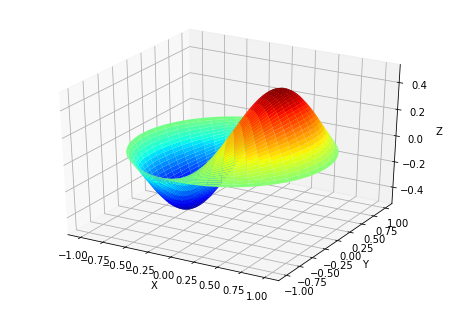

In [194]:
 from scipy import special
    
def drumhead_height(n,k,distance,angle,t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [216]:
from scipy import special
import numpy as np
x=2*1j*np.sqrt(-1j)
z0=special.jv(0,x)
z1=special.jv(1,x)
np.set_printoptions(precision=8,linewidth=214,suppress=True)     
print(z0,z1)

(0.751734182714-0.972291627307j) (0.997077651926+0.299775437002j)


In [16]:
        mr = 6
        A = special.ber(mr)*special.beip(mr)-special.bei(mr)*special.berp(mr)
        B = special.bei(mr)*special.beip(mr)+special.ber(mr)*special.berp(mr)
        C = special.berp(mr)**2+special.beip(mr)**2
        print('B/C=',B/C,'A/C=',A/C)
        a = special.ber(mr)+1j*special.bei(mr)
        b = special.berp(mr)+1j*special.beip(mr)
        c = a/b
        print(c)

B/C= 0.6978082627009973 A/C= 0.797863189938544
(0.6978082627009974-0.797863189938544j)
